# Importing Datasets and EDA 

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('Documents/Train.csv')
train

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [3]:
test=pd.read_csv('Documents/Test_Final.csv')
testO=test.copy()
test

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


In [4]:
#take some EDA into our train dataset
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [5]:
#lets find  shape of our features
train.shape

(188340, 10)

In [6]:
test.shape

(22265, 8)

In [7]:
#lets find the type of our features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [8]:
#lets find duplicated ones
train.duplicated().sum()

0

In [9]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store_id,188340.0,183.000000,105.366308,1.0,92.0,183.0,274.0,365.0
Holiday,188340.0,0.131783,0.338256,0.0,0.0,0.0,0.0,1.0
#Order,188340.0,68.205692,30.467415,0.0,48.0,63.0,82.0,371.0
Sales,188340.0,42784.327982,18456.708302,0.0,30426.0,39678.0,51909.0,247215.0


In [10]:
#lets break our model to dependent and independent
features=train.iloc[:,0:-1]
label=train.iloc[:,-1]

In [11]:
features

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62
...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70


In [12]:
label

0          7011.84
1         51789.12
2         36868.20
3         19715.16
4         45614.52
            ...   
188335    37272.00
188336    54572.64
188337    31624.56
188338    49162.41
188339    37977.00
Name: Sales, Length: 188340, dtype: float64

In [13]:
#Discount feature has just 2 classification so we  just use replace function to bring it to integer 
features['Discount']=features['Discount'].replace('No',0)
features['Discount']=features['Discount'].replace('Yes',1)

In [14]:
testO['Discount']=testO['Discount'].replace('No',0)
testO['Discount']=testO['Discount'].replace('Yes',1)

In [15]:
features['Discount'].dtype

dtype('int64')

In [16]:
features['Store_id'].unique().sum()

66795

In [17]:
features['Store_Type'].unique().sum()

'S1S4S3S2'

In [18]:
#converting date dtype of obeject into datetime type
from datetime import datetime as dt
features['Date']=[dt.strptime(x,'%Y-%m-%d') for x in list(features['Date'])]
features['Date'].head()

0   2018-01-01
1   2018-01-01
2   2018-01-01
3   2018-01-01
4   2018-01-01
Name: Date, dtype: datetime64[ns]

In [21]:
features['Date'].dtype

dtype('<M8[ns]')

# Visualization

In [19]:
#lets visualize the training set before we do feature engineering 
import  matplotlib.pyplot as plt
import seaborn as sns

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '0 means no dicount and 1 means discount')

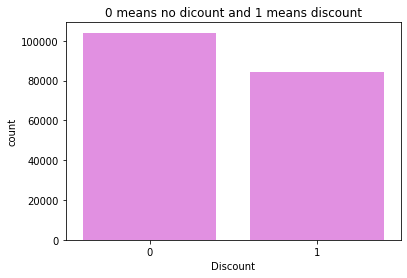

In [20]:
sns.countplot(features['Discount'],color='violet')
plt.title("0 means no dicount and 1 means discount")

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday', ylabel='count'>

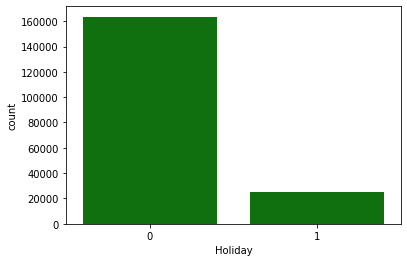

In [21]:
sns.countplot(features['Holiday'],color='green')

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count of orders')

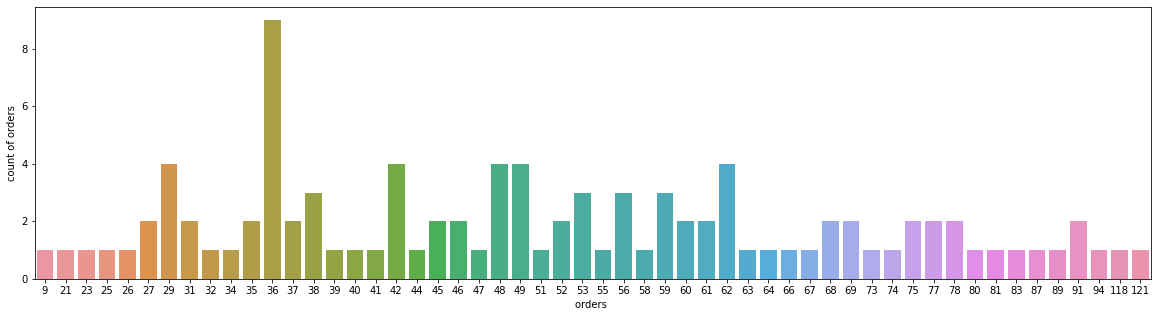

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(features['#Order'].iloc[:100])
plt.xlabel('orders ')
plt.ylabel('count of orders')

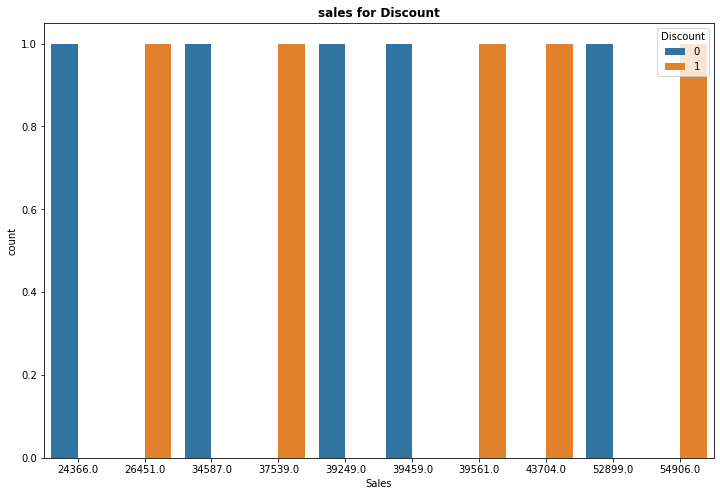

In [23]:
f,ax=plt.subplots(figsize=(12,8))
sns.countplot(x=label.sample(10),data=features,hue='Discount').set_title("sales for Discount",weight = 'bold')
#plt.ylabel()
plt.show()

Text(0.5, 1.0, 'sales for Holidays')

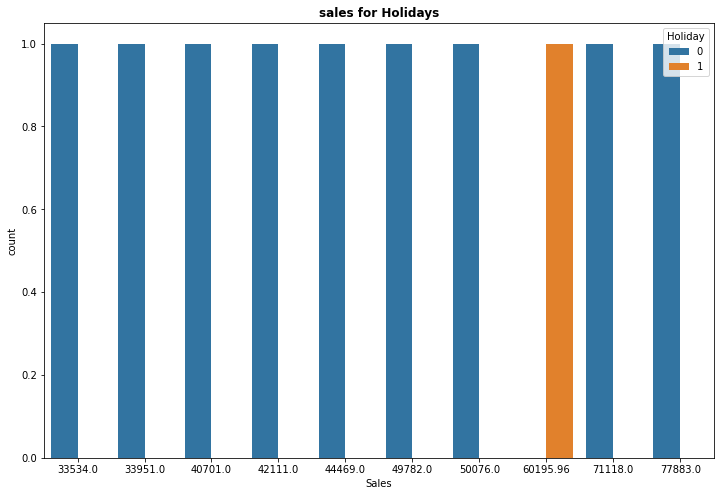

In [24]:
f,ax=plt.subplots(figsize=(12,8))
sns.countplot(x=label.sample(10),data=features,hue='Holiday').set_title("sales for Holidays",weight = 'bold')

In [25]:
#from above we conclude that during holdidays and Discount the sales is incresing than working days and with No Discount

Text(0.5, 1.0, 'Location')

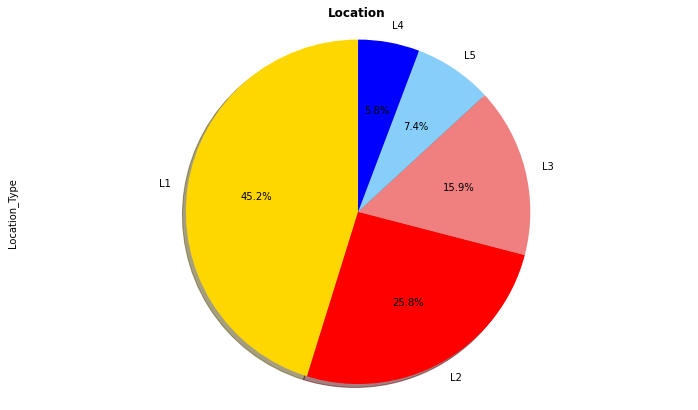

In [26]:
plt.figure(figsize=(12,7))
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver','violet']
ax=features['Location_Type'].value_counts().plot(kind='pie',shadow=True,colors=colors,startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Location", weight = 'bold')

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Region_Code'>

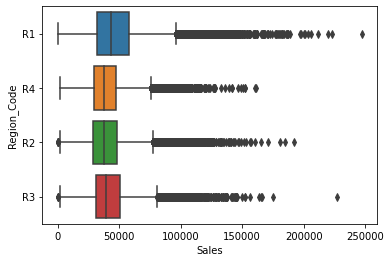

In [27]:
sns.boxplot(label,features['Region_Code'])

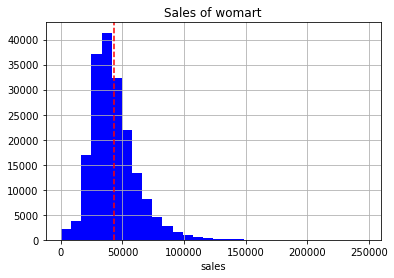

42784.327981522765


In [28]:
#normal distribution of label
label.hist(color='b',bins=30)
plt.axvline(x=label.mean(),color='red',ls='--')
plt.title("Sales of womart")
plt.xlabel('sales')
plt.show()
print(label.mean())

In [29]:
M=label.max()
m=label.min()
a=label.mean()
print('maxiumum sales is {0} , mimimum sales is {1} , average sales is {2}'.format((M),(m),(a)))

maxiumum sales is 247215.0 , mimimum sales is 0.0 , average sales is 42784.327981522765


# FEATURE ENGINEERING AND SPLITTING 

In [30]:
#so its time for ready to prepare troops for modelling lets convert needed catogorical features into numerical
# we need [Store_Type,Location_Type,Region_Code] to converted to numerical to train our model
one=pd.get_dummies(features['Store_Type'],drop_first=True)
two=pd.get_dummies(features['Location_Type'],drop_first=True)
three=pd.get_dummies(features['Region_Code'],drop_first=True)

In [31]:
s=pd.get_dummies(testO['Store_Type'],drop_first=True)
l=pd.get_dummies(testO['Location_Type'],drop_first=True)
r=pd.get_dummies(testO['Region_Code'],drop_first=True)

In [32]:
for i in range(1):
    try:
        features=pd.concat([features,one],axis=1) 
        features=pd.concat([features,two],axis=1)
        features=pd.concat([features,three],axis=1)
    except:
        print('error')

In [33]:
for i in range(1):
    try:
        testO=pd.concat([testO,s],axis=1) 
        testO=pd.concat([testO,l],axis=1)
        testO=pd.concat([testO,r],axis=1)
    except:
        print('error')

In [34]:
features.drop(['Store_Type','Location_Type','Region_Code'],axis=1,inplace=True)
features.drop(['#Order'],axis=1,inplace=True)

In [35]:
testO.drop(['Store_Type','Location_Type','Region_Code'],axis=1,inplace=True)

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,label, test_size=0.20,random_state=42)

In [37]:
xtrain=features.drop(['ID','Date'],axis=1,inplace=True)

In [38]:
xtest.drop(['ID','Date'],axis=1,inplace=True)

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
testO.drop(['ID','Date'],axis=1,inplace=True)

In [42]:
xtrain.shape

(150672, 13)

# Model Building

LINEAR REGRESSION

In [43]:
#lets go for battle with selected troops
#this is continuous variables in target variable so this is rergression model 
#so using trees,linear regression,svm to watch out for
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
training=Lr.fit(xtrain,ytrain)
prediction=training.predict(xtest)

In [44]:
prediction

array([27466.14513596, 62495.57083382, 46315.83601488, ...,
       26865.13011294, 45036.7671384 , 51881.60050879])

In [45]:
training.score(xtest,ytest)

0.546793287511736

RANDOM FOREST REGRESSOR

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [83]:
rf.score(xtrain,ytrain)

0.6592265773016666

In [48]:
rf.score(xtest,ytest)

0.6466802815812684

LASSO REGRESSOR

In [49]:
from sklearn.linear_model import Lasso

In [50]:
l=Lasso().fit(xtrain,ytrain)

In [51]:
l.score(xtrain,ytrain)

0.5495065146862482

In [52]:
l.score(xtest,ytest)

0.5467982940143057

EXTRA TREE REGRESSOR

In [53]:
from sklearn.ensemble import  ExtraTreesRegressor
ETR=ExtraTreesRegressor(n_estimators = 150)
ETR.fit(xtrain,ytrain)
pred=ETR.predict(xtest)
ETR.score(xtest,ytest)

0.6467450156363577

# PREDICTING TEST DATA WITH HIGH ACCURACY MODEL (RANDOMFOREST)

In [54]:
Sales=rf.predict(testO)

In [55]:
import numpy as np
sales=pd.DataFrame({'sales':np.round(Sales,2)},index=None)
sales

,sales
0,49464.18
1,35841.20
2,70562.90
3,33056.96
4,36238.03
...,...
22260,20045.05
22261,57185.83
22262,48996.72
22263,31663.76


# concating predicted sales with test data

In [103]:
#we concat our predicted test datas sales value with test data
final=pd.DataFrame.join(test,sales)
final

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,R2,R3,R4,sales
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,0,1,0,49177.02
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,0,0,0,35840.92
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,0,0,0,70511.52
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,0,0,1,33072.21
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,1,0,0,36267.65
...,...,...,...,...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No,1,0,0,20037.85
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No,0,0,0,57408.10
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes,0,1,0,49001.20
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No,0,0,1,31590.00


# Final Output

In [60]:
output=pd.DataFrame({'ID':test['ID'] ,'Sales':np.round(Sales,2)})
output.sample(10)

,ID,Sales
6903,T1195244,39097.28
12626,T1200967,51138.51
6430,T1194771,68758.98
4861,T1193202,26941.60
15285,T1203626,61105.95
6237,T1194578,55570.64
3343,T1191684,54117.04
19965,T1208306,65851.90
9871,T1198212,34246.33
1863,T1190204,57151.85


In [58]:
output.to_csv('Documents/Sales_Prediction')

In [61]:
#though our model gives only 65% still we can rise the performance by hyperparameter tuning and high quality data 
#quality and quantity must be crucial thought of the data 